# AUTOMOBILE PRICE PREDICTION

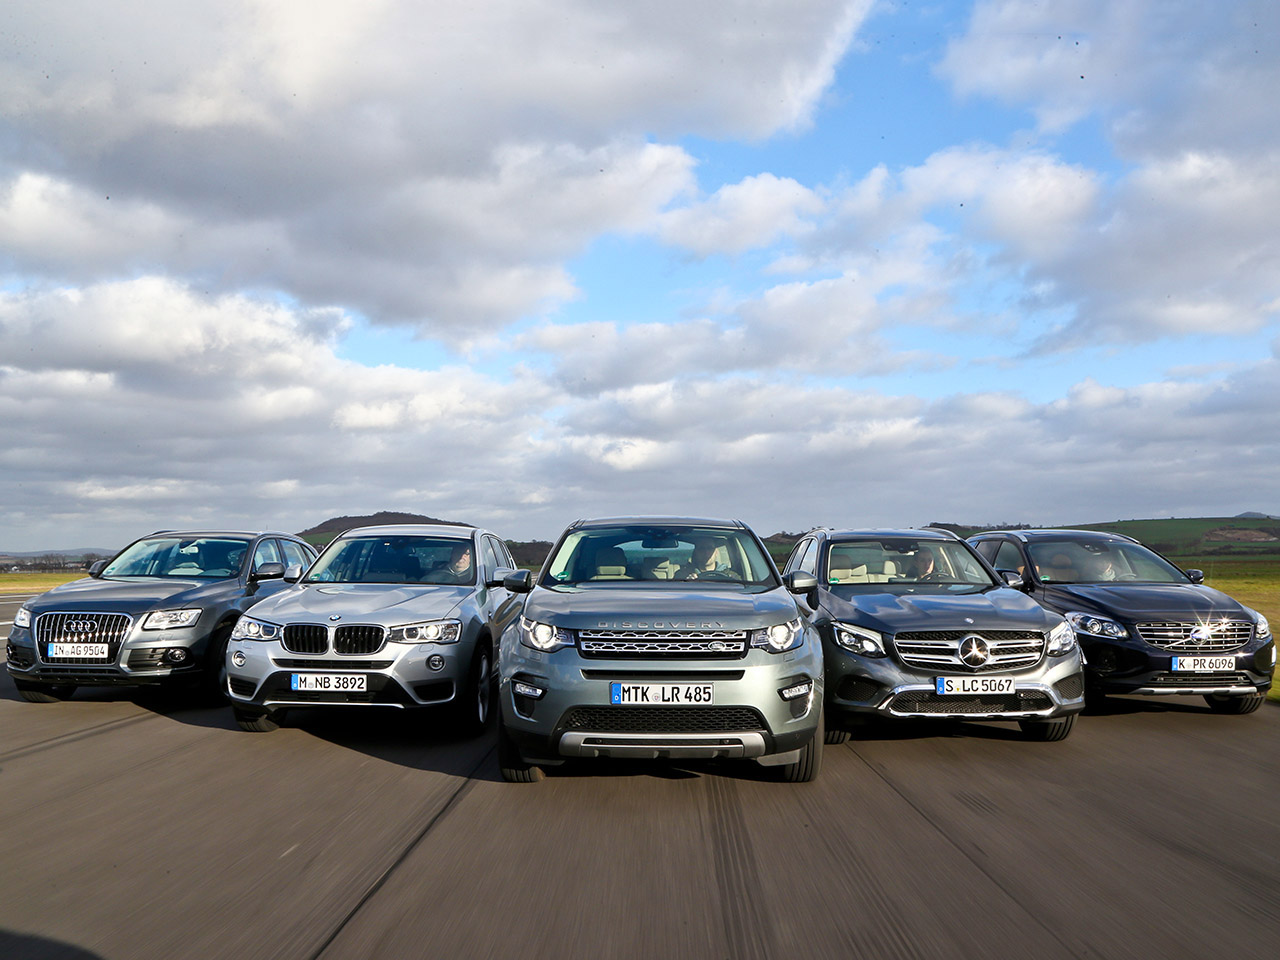

### IMPORTING LIBRARIES

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler,RobustScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsRegressor

### LOADING THE DATASET

In [5]:
data = pd.read_csv("./auto_clean.csv")
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [7]:
data.shape

(201, 29)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,201.0,0.840796,1.254802,-2.000000,0.000000,1.000000,2.000000,3.000000
normalized-losses,201.0,122.000000,31.996250,65.000000,101.000000,122.000000,137.000000,256.000000
wheel-base,201.0,98.797015,6.066366,86.600000,94.500000,97.000000,102.400000,120.900000
length,201.0,0.837102,0.059213,0.678039,0.801538,0.832292,0.881788,1.000000
width,201.0,0.915126,0.029187,0.837500,0.890278,0.909722,0.925000,1.000000
height,201.0,53.766667,2.447822,47.800000,52.000000,54.100000,55.500000,59.800000
curb-weight,201.0,2555.666667,517.296727,1488.000000,2169.000000,2414.000000,2926.000000,4066.000000
engine-size,201.0,126.875622,41.546834,61.000000,98.000000,120.000000,141.000000,326.000000
bore,201.0,3.330692,0.268072,2.540000,3.150000,3.310000,3.580000,3.940000
stroke,197.0,3.256904,0.319256,2.070000,3.110000,3.290000,3.410000,4.170000


### Multi variate analysis

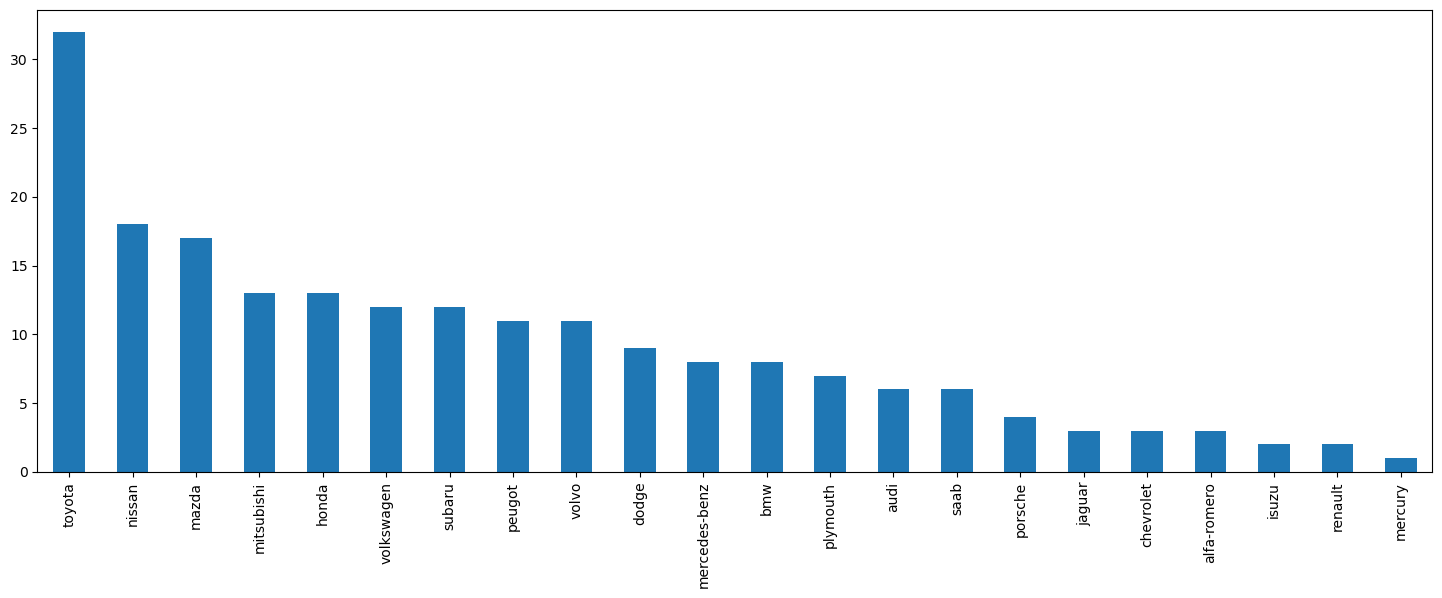

In [9]:
data.make.value_counts().plot.bar(figsize=(18,6));

In [26]:
data.rename(columns={"normalized-losses":"Normalized_losses", "num-of-doors":"Num_of_doors", 'fuel-type':'Fuel_type','body-style':'Body_style', 'drive-wheels':'Drive_wheels', 'engine-location':'Engine_location','wheel-base':'Wheel_base','curb-weight':'Curb_weight', 'engine-type':'Engine_type','num-of-cylinders':'Num_of_cylinders', 'engine-size':'Engine_size', 'fuel-system':'Fuel_system','compression-ratio':'Compression_ratio','peak-rpm':'Peak_rpm', 'city-mpg':'City_mpg',
       'highway-mpg':'Highway-mpg'}, inplace=True)

In [27]:
data.columns

Index(['symboling', 'Normalized_losses', 'make', 'aspiration', 'Num_of_doors',
       'Body_style', 'Drive_wheels', 'Engine_location', 'Wheel_base', 'length',
       'width', 'height', 'Curb_weight', 'Engine_type', 'Num_of_cylinders',
       'Engine_size', 'Fuel_system', 'bore', 'stroke', 'Compression_ratio',
       'horsepower', 'Peak_rpm', 'City_mpg', 'Highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

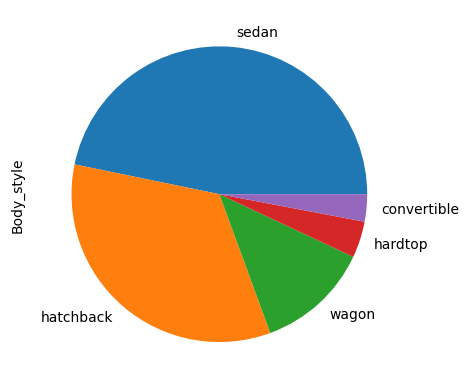

In [13]:
data.Body_style.value_counts().plot.pie();

In [14]:
data.head()

,symboling,Normalized_losses,make,aspiration,Num_of_doors,Body_style,Drive_wheels,Engine_location,Wheel_base,length,...,Compression_ratio,horsepower,Peak_rpm,City_mpg,Highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


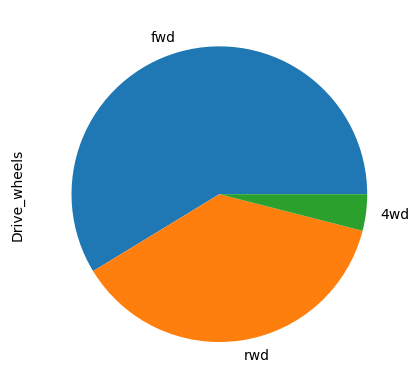

In [15]:
data.Drive_wheels.value_counts().plot.pie();

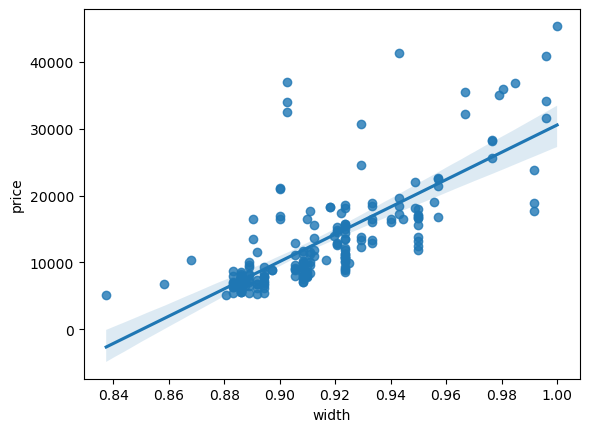

In [16]:
sns.regplot(x='width',y='price',data=data);

##### The 'width' is 'highly' correlated with price

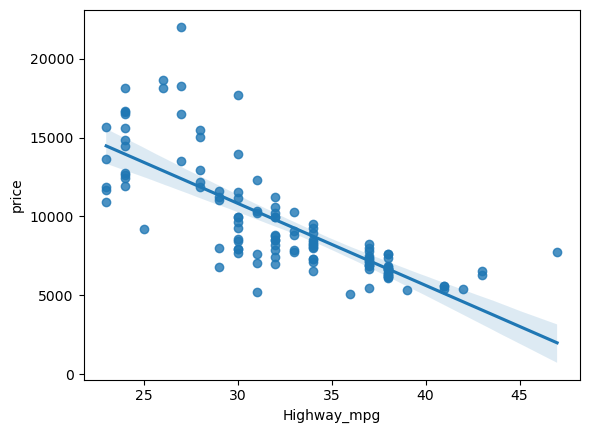

In [166]:
sns.regplot(x="Highway_mpg", y="price", data=data);

In [18]:
data.columns

Index(['symboling', 'Normalized_losses', 'make', 'aspiration', 'Num_of_doors',
       'Body_style', 'Drive_wheels', 'Engine_location', 'Wheel_base', 'length',
       'width', 'height', 'Curb_weight', 'Engine_type', 'Num_of_cylinders',
       'Engine_size', 'Fuel_system', 'bore', 'stroke', 'Compression_ratio',
       'horsepower', 'Peak_rpm', 'City_mpg', 'Highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

## DATA PREPROCESSING

#### REPLACE THE "?" WITH np.nan

In [ ]:
data.replace(to_replace='?', value=np.nan, inplace=True)

### Renaming the columns

In [54]:
data.rename(columns={"normalized-losses":"Normalized_losses", "num-of-doors":"Num_of_doors", 'fuel-type':'Fuel_type','body-style':'Body_style', 'drive-wheels':'Drive_wheels', 'engine-location':'Engine_location','wheel-base':'Wheel_base','curb-weight':'Curb_weight', 'engine-type':'Engine_type','num-of-cylinders':'Num_of_cylinders', 'engine-size':'Engine_size', 'fuel-system':'Fuel_system','compression-ratio':'Compression_ratio','peak-rpm':'Peak_rpm', 'city-mpg':'City_mpg',
       'highway-mpg':'Highway-mpg','horsepower-binned':'horsepower_binned','Highway-mpg':'Highway_mpg'}, inplace=True)

#### LETS CHANGE THE NUMBER OF DOORS INTO CORRESPONDING NUMERICAL VALUES.

In [34]:
data.Num_of_doors.replace({"four":4, "two":2,"six":6, "five":5, "three":3, "eight":8},inplace=True)

#### LETS CHANGE THE NUMBER OF CYLINDERS INTO CORRESPONDING NUMERICAL VALUES.

In [35]:
data.Num_of_cylinders.replace({'four':4, 'six':6 ,'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}, inplace=True)

#### SOME COLUMNS ARE WRONGLY SET AS OBJECT DATA TYPE. LETS FIND AND CONVERT THEM.

In [55]:
for i in data.columns:
    if data[i].dtypes == 'object':
        print(i, data[i].unique())

make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
aspiration ['std' 'turbo']
Body_style ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Drive_wheels ['rwd' 'fwd' '4wd']
Engine_location ['front' 'rear']
Engine_type ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
Fuel_system ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
horsepower_binned ['Medium' 'Low' 'High' nan]


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   Normalized_losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   Num_of_doors       201 non-null    int64  
 5   Body_style         201 non-null    object 
 6   Drive_wheels       201 non-null    object 
 7   Engine_location    201 non-null    object 
 8   Wheel_base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  Curb_weight        201 non-null    int64  
 13  Engine_type        201 non-null    object 
 14  Num_of_cylinders   201 non-null    int64  
 15  Engine_size        201 non-null    int64  
 16  Fuel_system        201 non

In [44]:
data.head()

,symboling,Normalized_losses,make,aspiration,Num_of_doors,Body_style,Drive_wheels,Engine_location,Wheel_base,length,...,Compression_ratio,horsepower,Peak_rpm,City_mpg,Highway_mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,2,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,2,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,2,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,4,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,4,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [47]:
# Checking duplicated values
data.duplicated().sum()

0

In [58]:
# Checking null values
data.isnull().mean()*100

symboling            0.000000
Normalized_losses    0.000000
make                 0.000000
aspiration           0.000000
Num_of_doors         0.000000
Body_style           0.000000
Drive_wheels         0.000000
Engine_location      0.000000
Wheel_base           0.000000
length               0.000000
width                0.000000
height               0.000000
Curb_weight          0.000000
Engine_type          0.000000
Num_of_cylinders     0.000000
Engine_size          0.000000
Fuel_system          0.000000
bore                 0.000000
stroke               1.990050
Compression_ratio    0.000000
horsepower           0.000000
Peak_rpm             0.000000
City_mpg             0.000000
Highway_mpg          0.000000
price                0.000000
city-L/100km         0.000000
horsepower_binned    0.497512
diesel               0.000000
gas                  0.000000
dtype: float64

In [65]:
data.stroke.fillna(data.stroke.mean(),inplace=True)

In [62]:
data.drop(columns='horsepower_binned',inplace=True)

In [66]:
data.isnull().mean()*100

symboling            0.0
Normalized_losses    0.0
make                 0.0
aspiration           0.0
Num_of_doors         0.0
Body_style           0.0
Drive_wheels         0.0
Engine_location      0.0
Wheel_base           0.0
length               0.0
width                0.0
height               0.0
Curb_weight          0.0
Engine_type          0.0
Num_of_cylinders     0.0
Engine_size          0.0
Fuel_system          0.0
bore                 0.0
stroke               0.0
Compression_ratio    0.0
horsepower           0.0
Peak_rpm             0.0
City_mpg             0.0
Highway_mpg          0.0
price                0.0
city-L/100km         0.0
diesel               0.0
gas                  0.0
dtype: float64

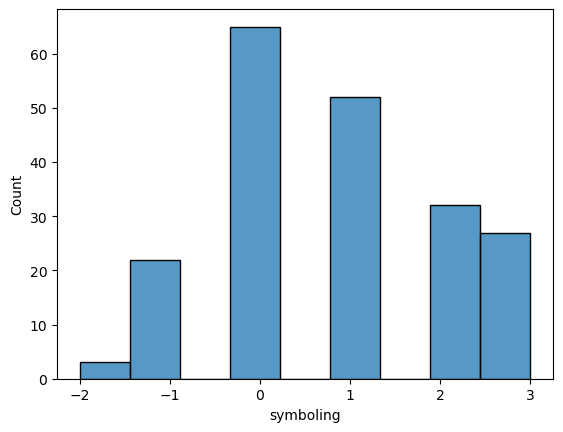

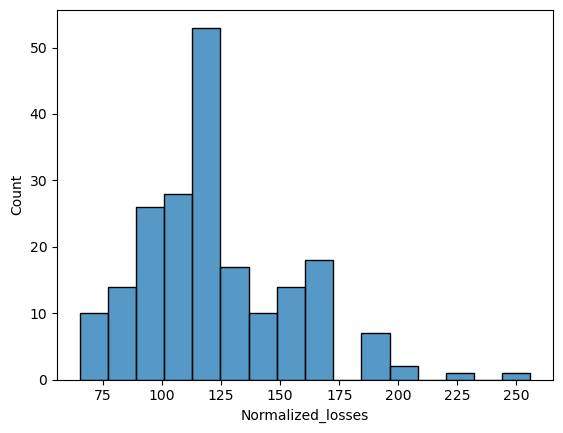

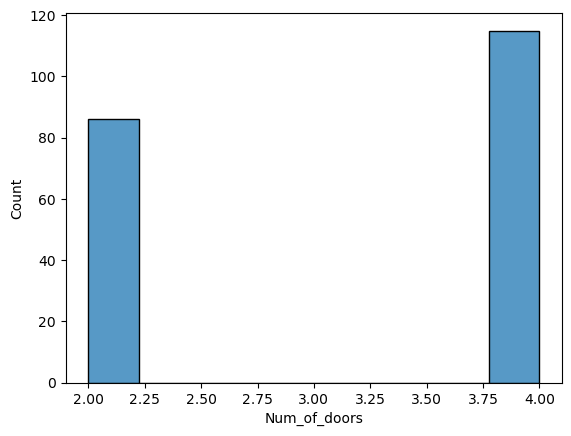

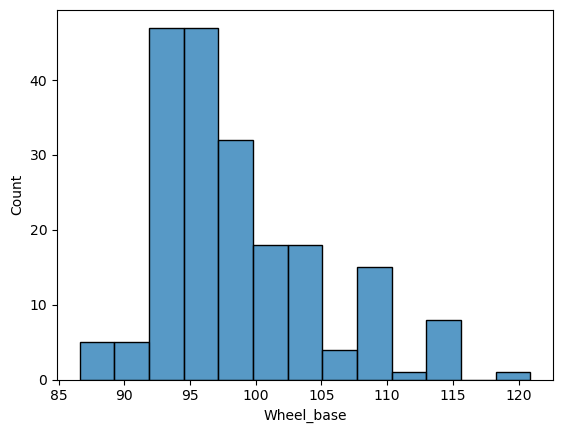

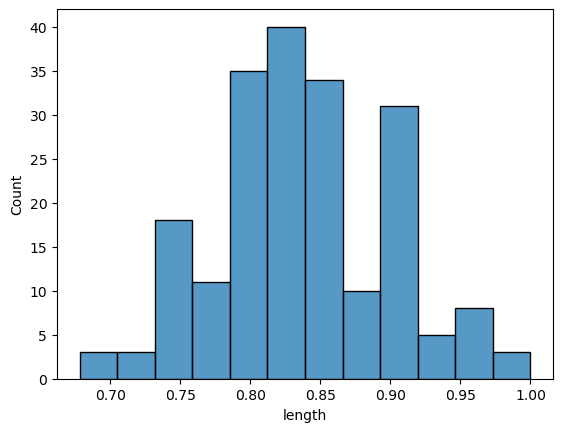

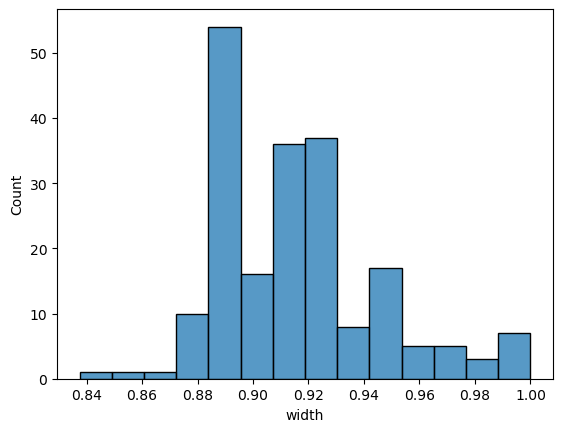

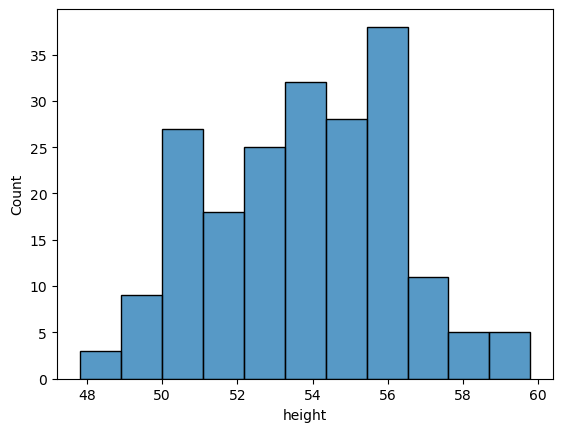

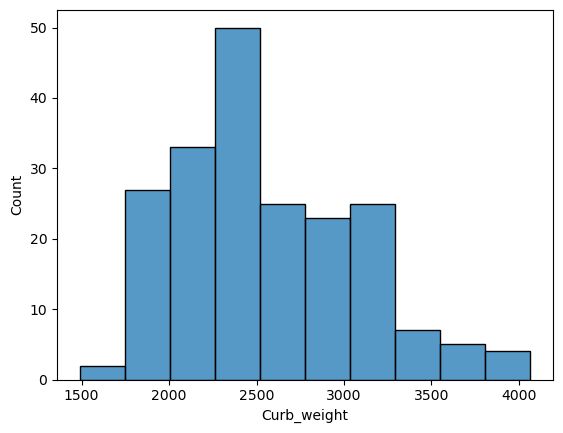

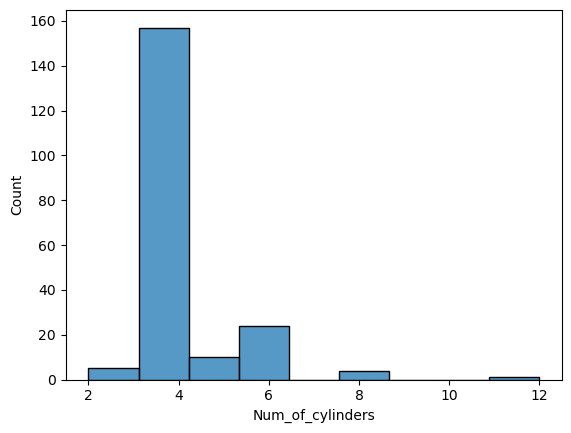

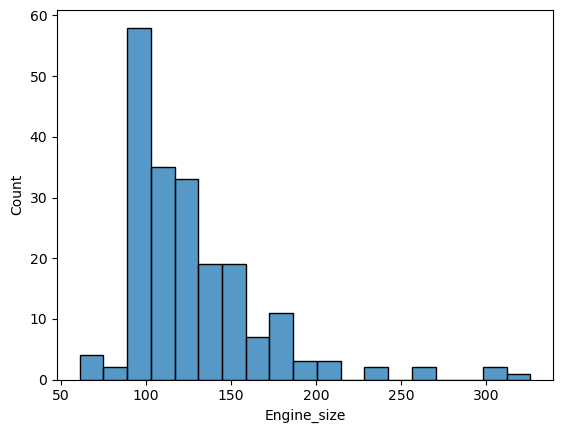

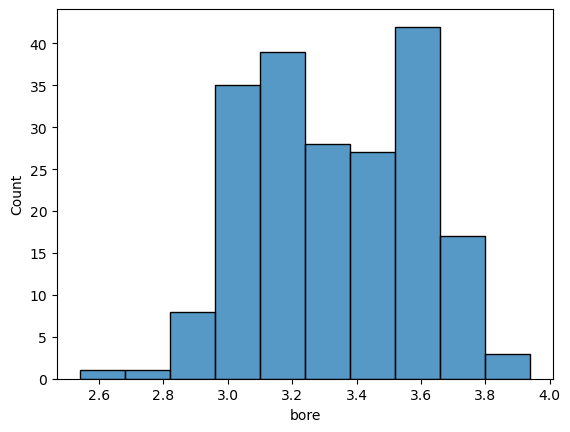

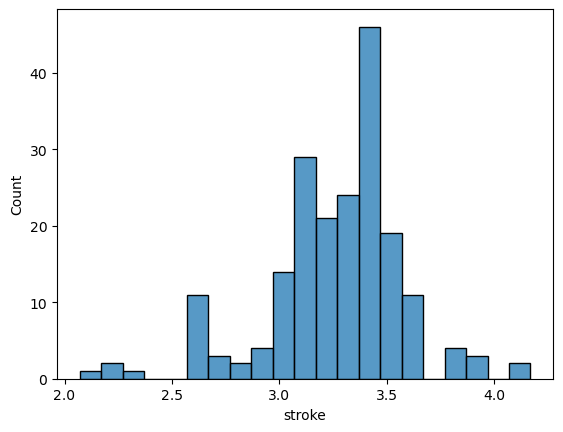

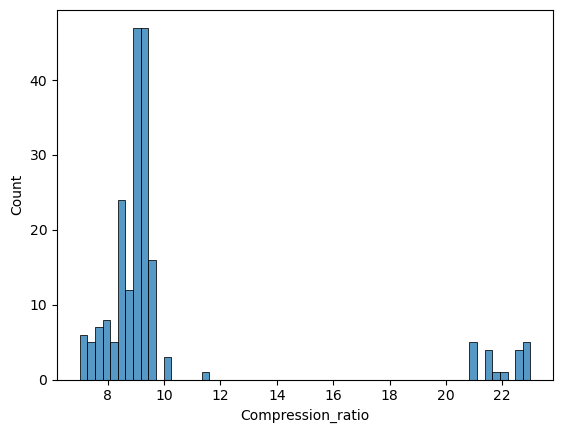

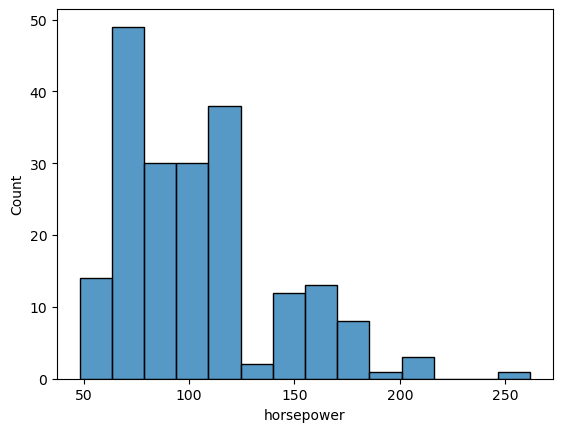

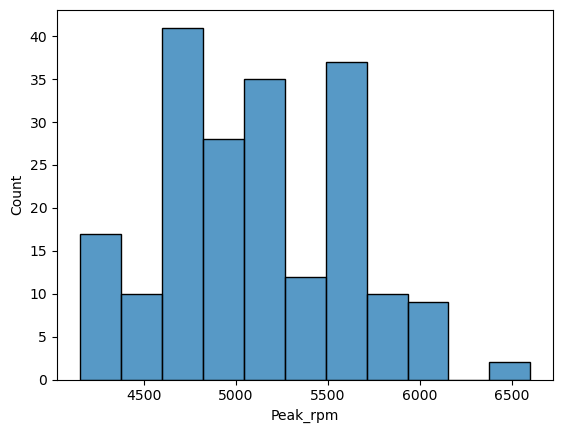

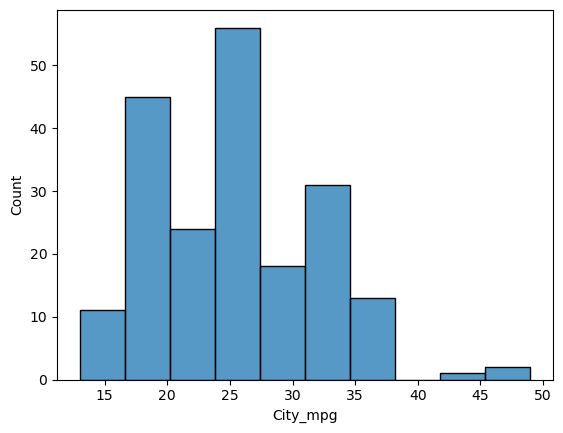

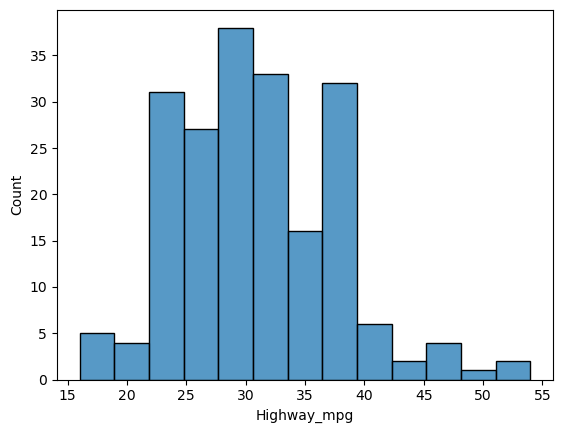

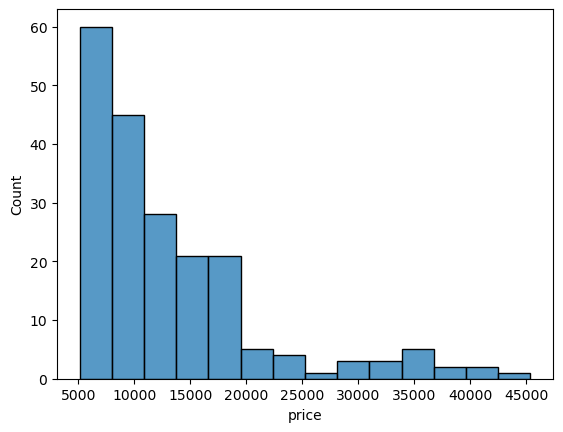

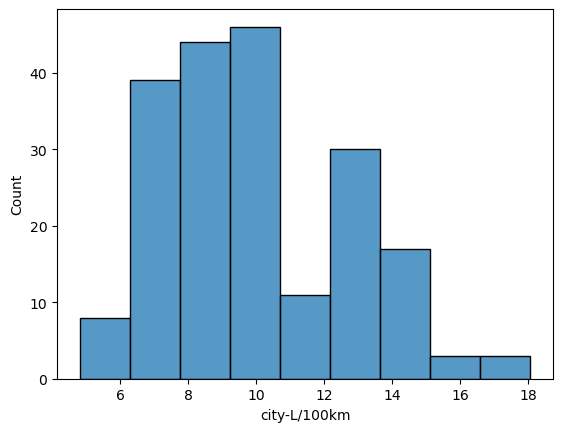

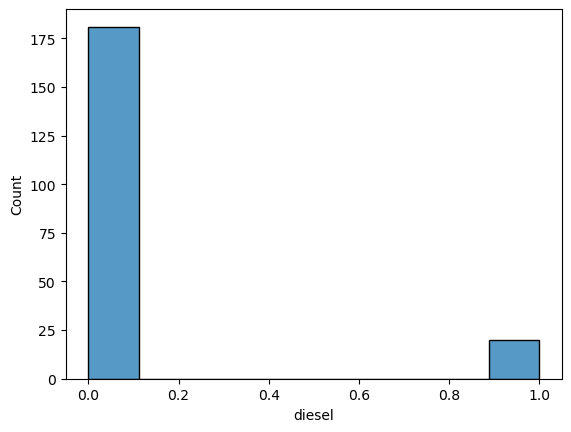

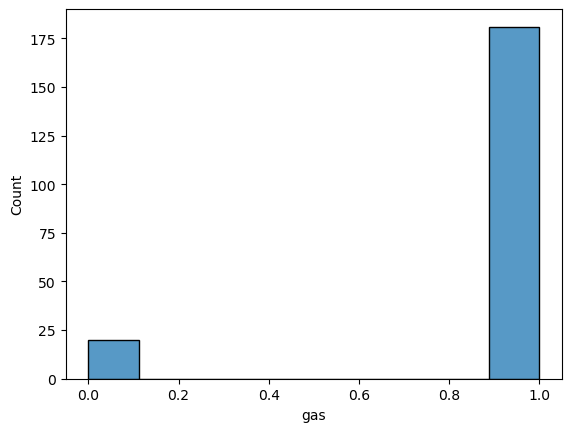

In [48]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.histplot(x=data[i])
        plt.show()

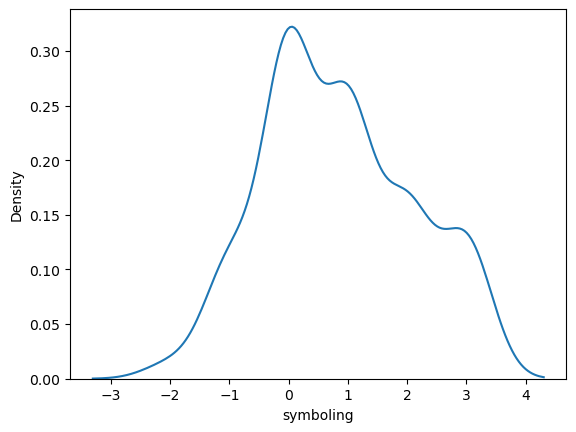

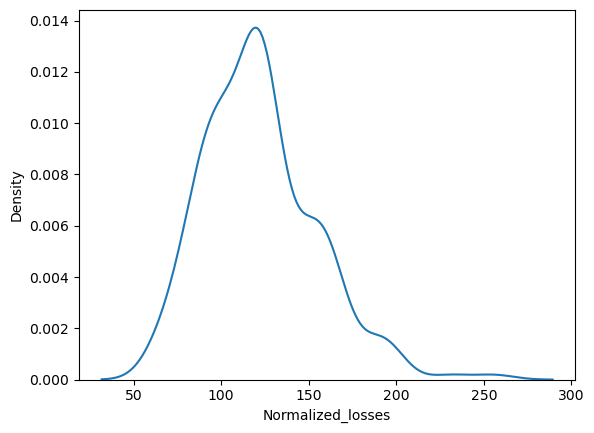

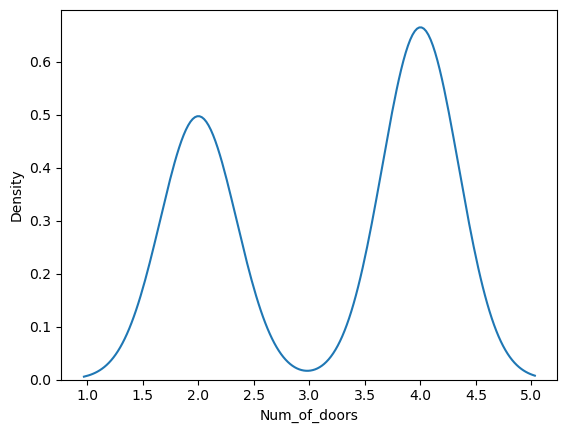

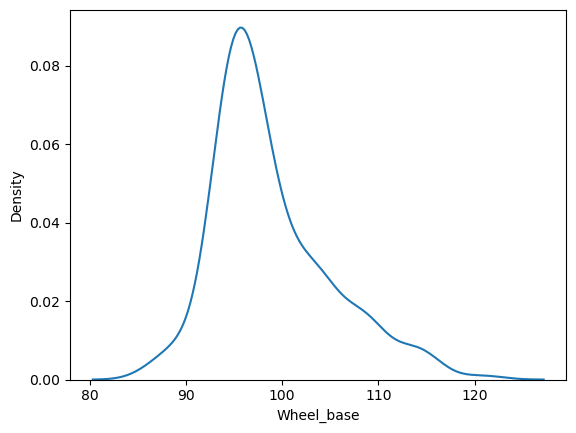

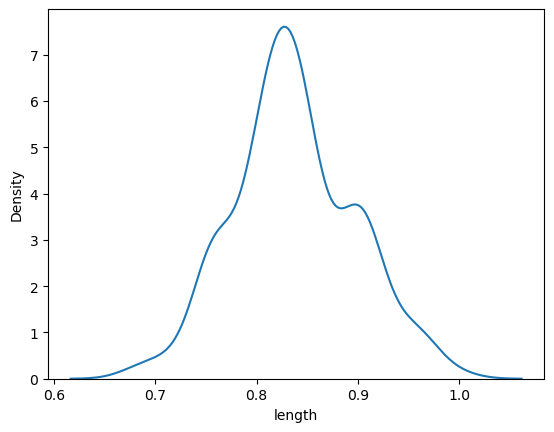

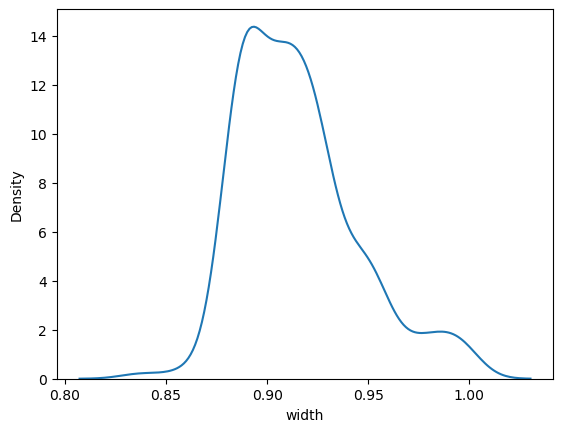

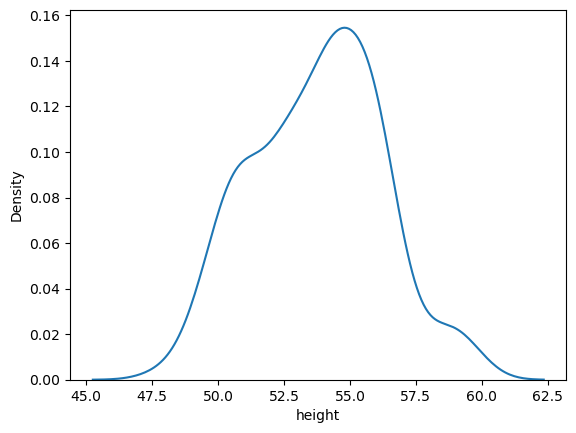

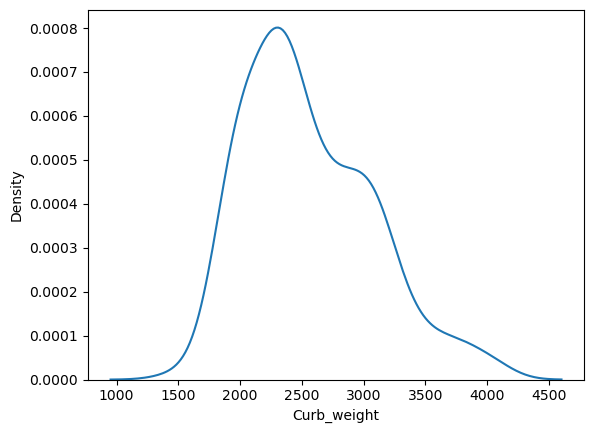

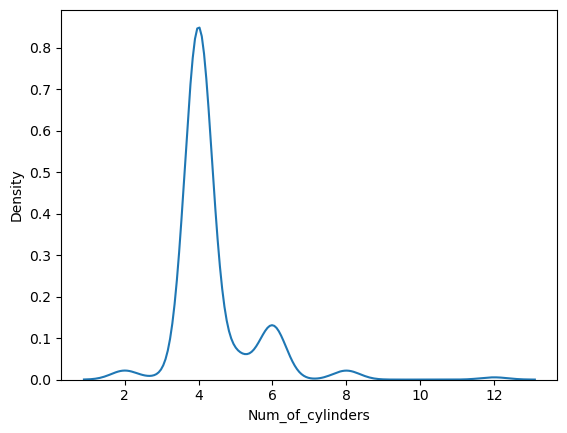

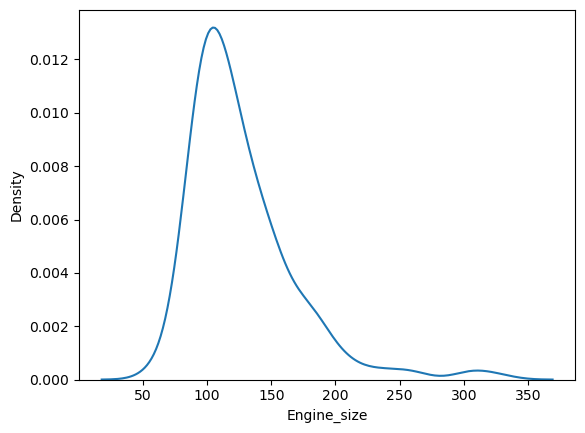

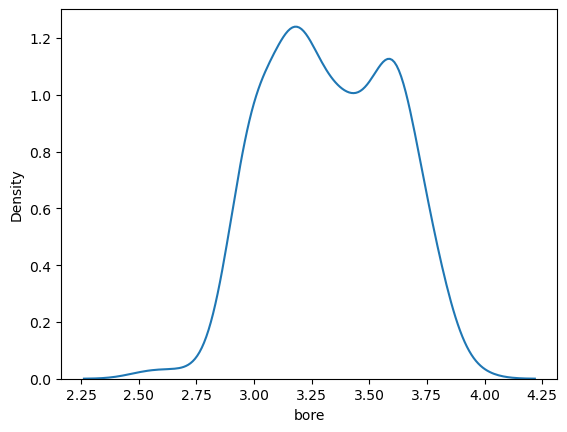

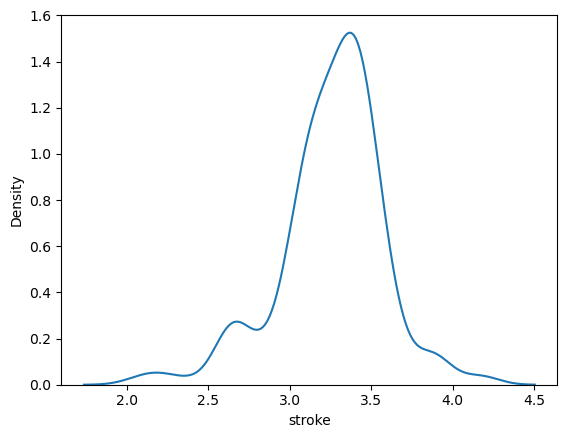

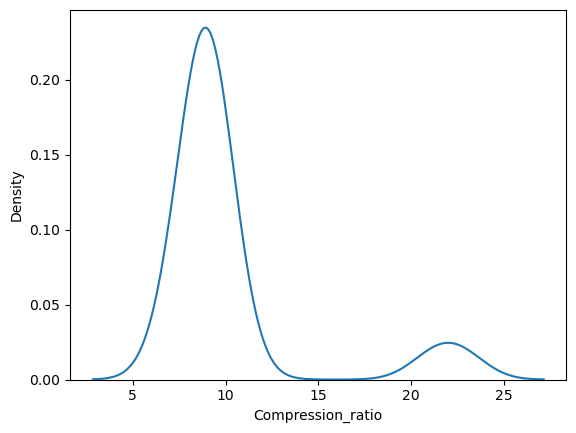

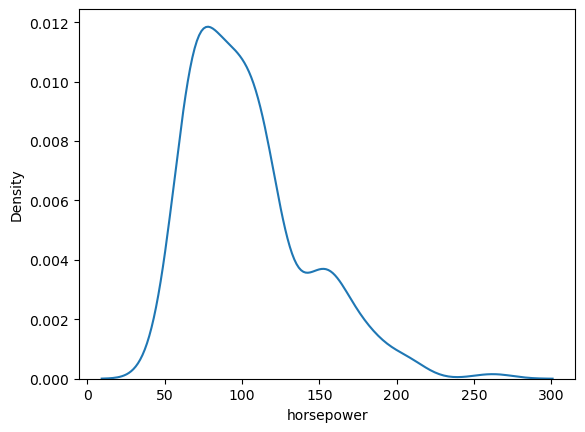

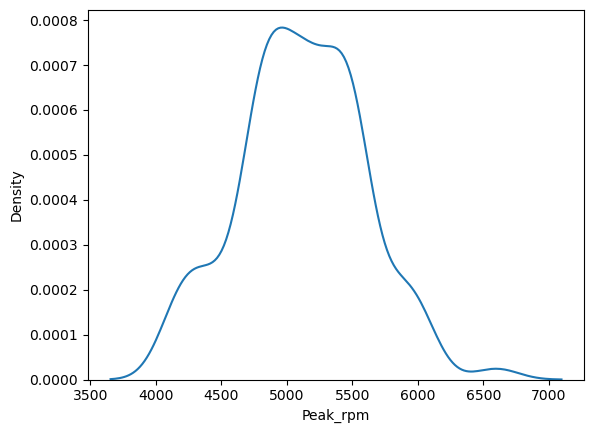

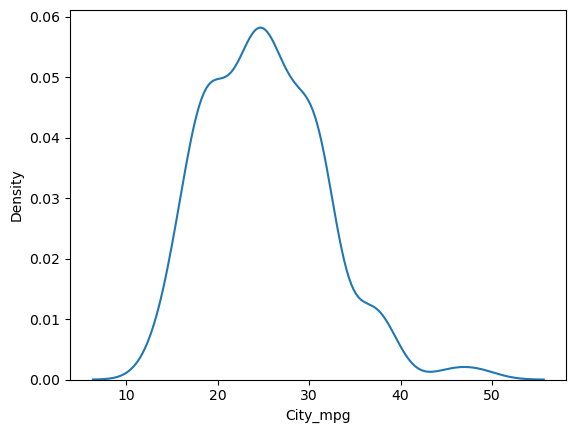

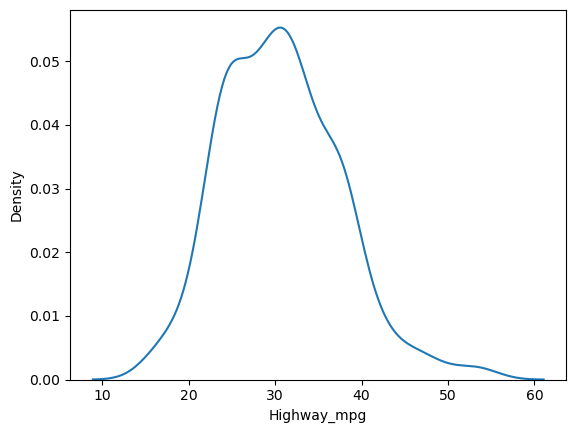

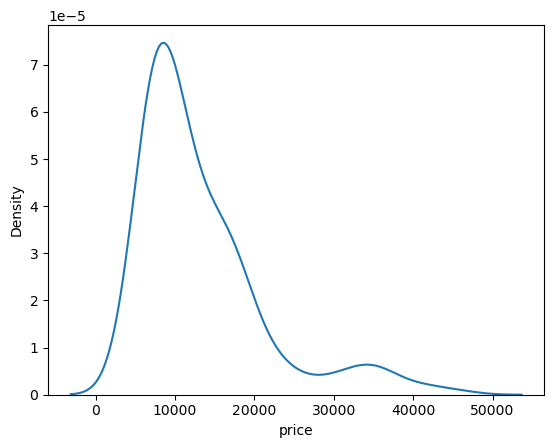

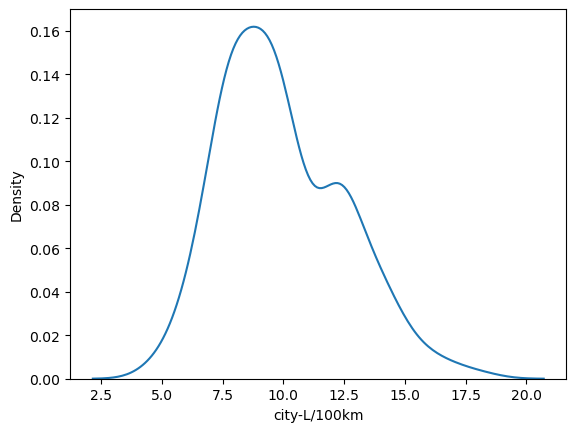

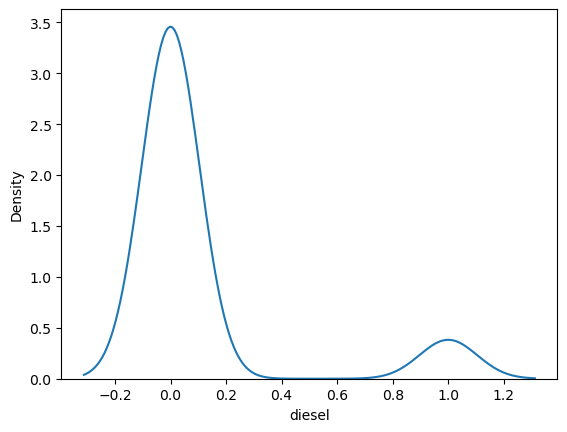

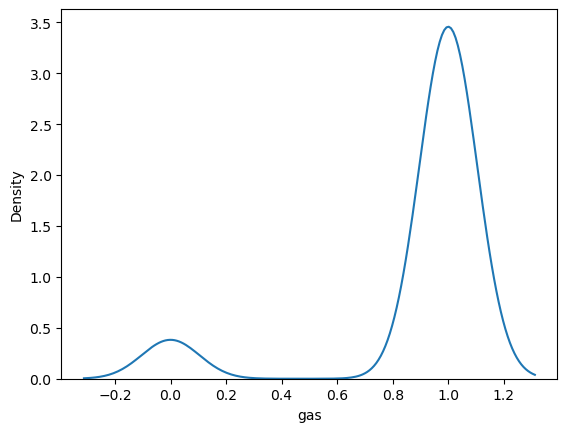

In [49]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.kdeplot(x=data[i])
        plt.show()

## OUTLIER TREATMENT
#### BOXPLOT

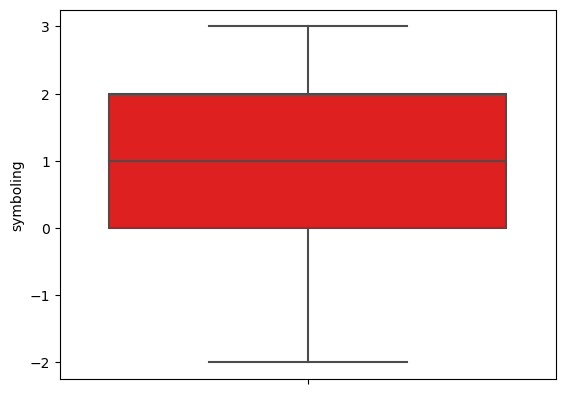

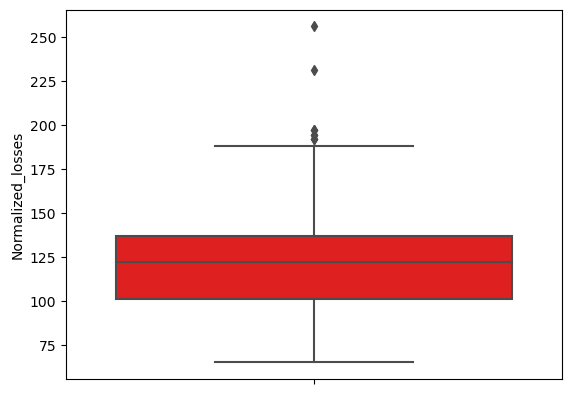

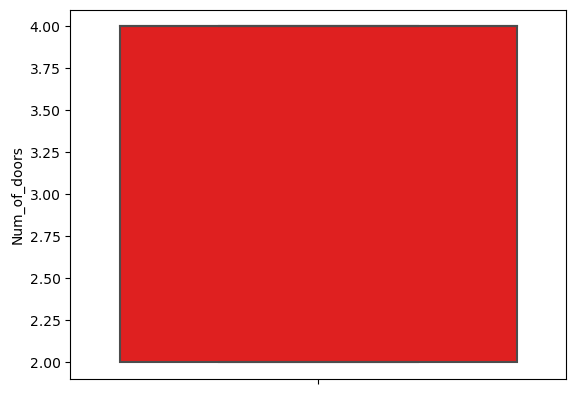

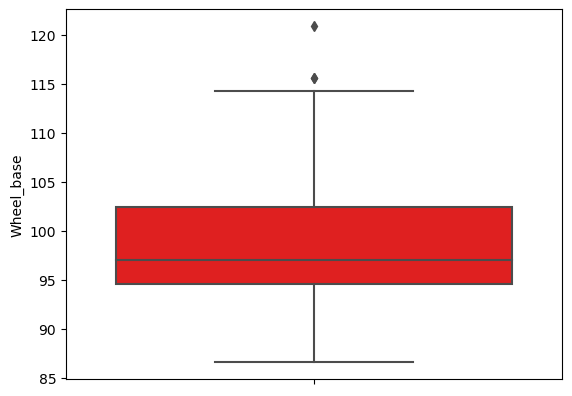

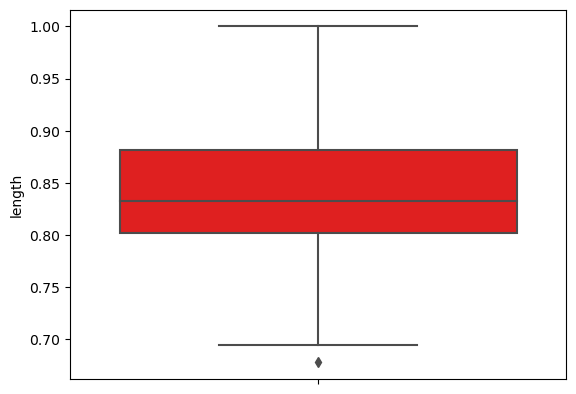

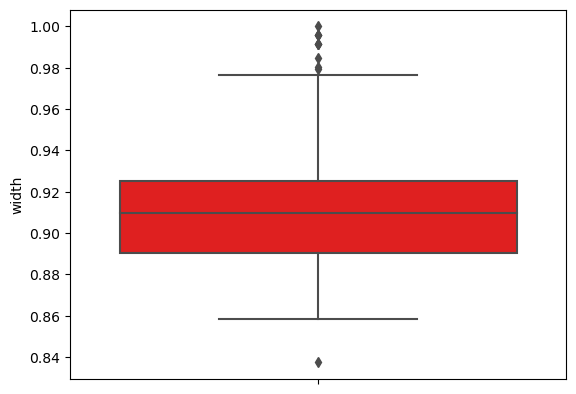

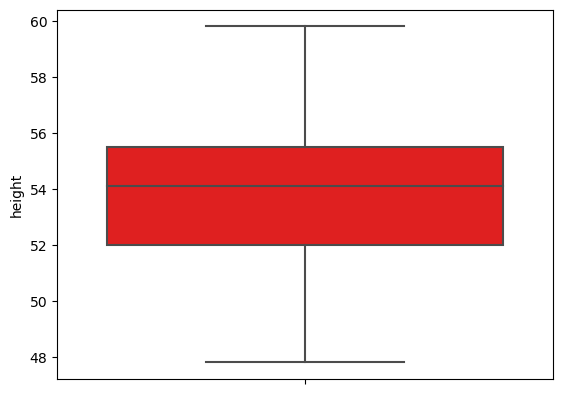

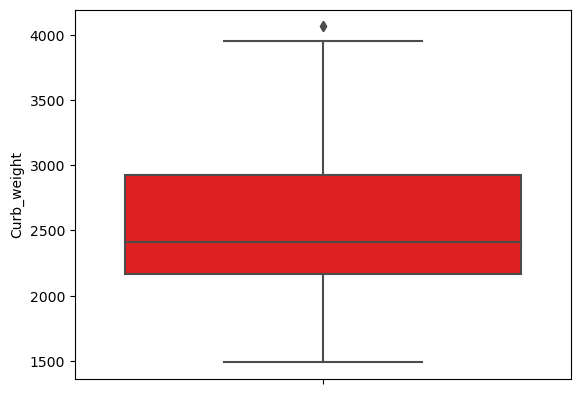

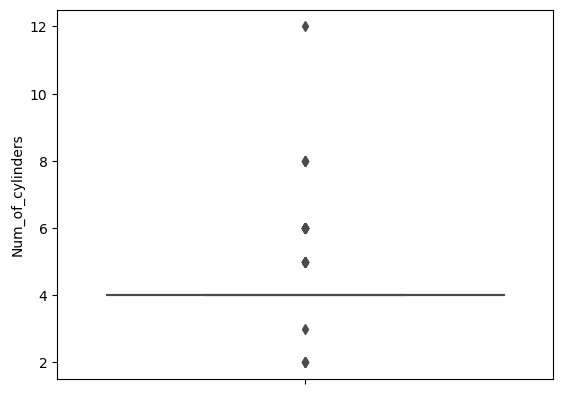

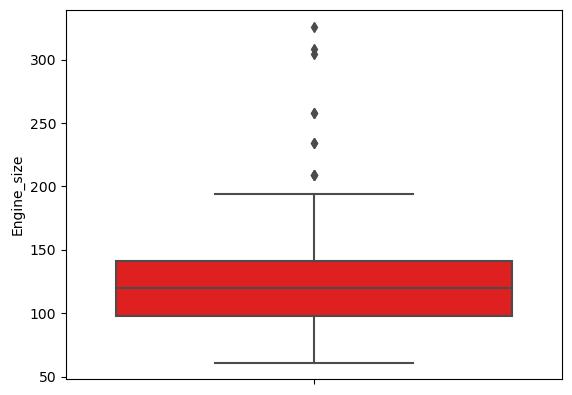

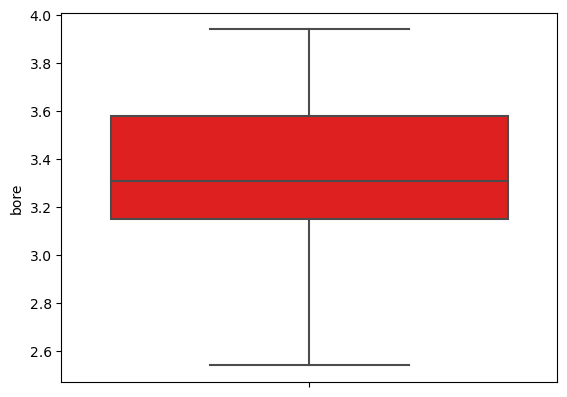

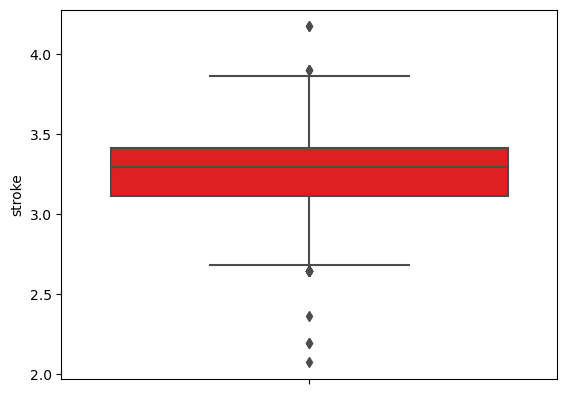

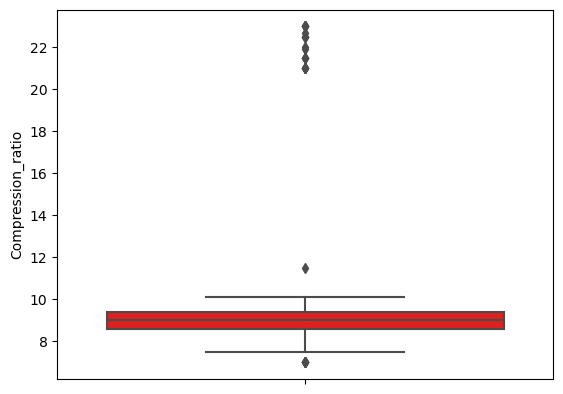

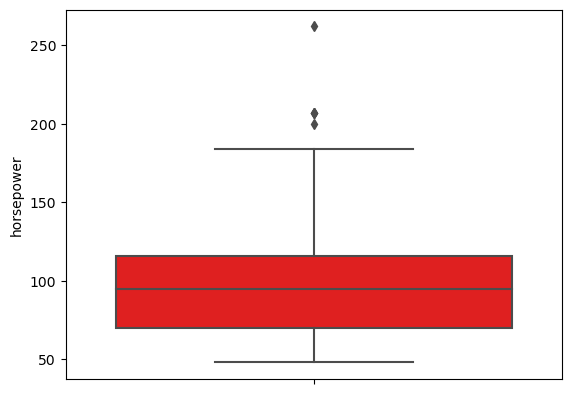

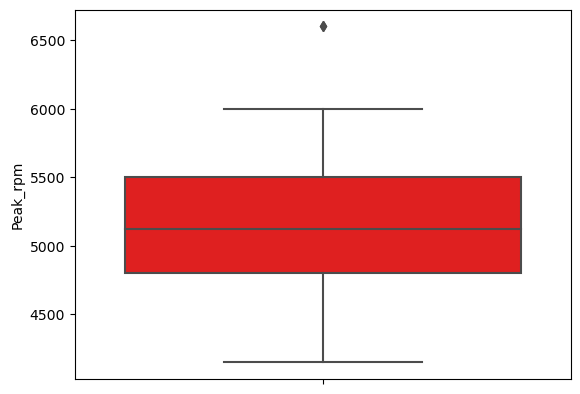

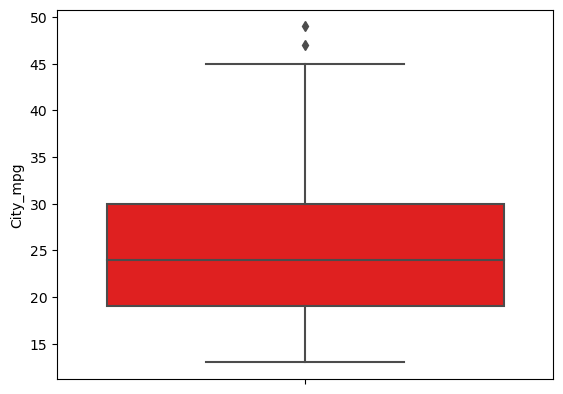

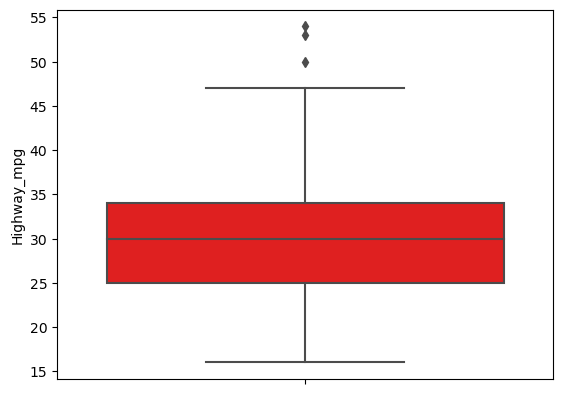

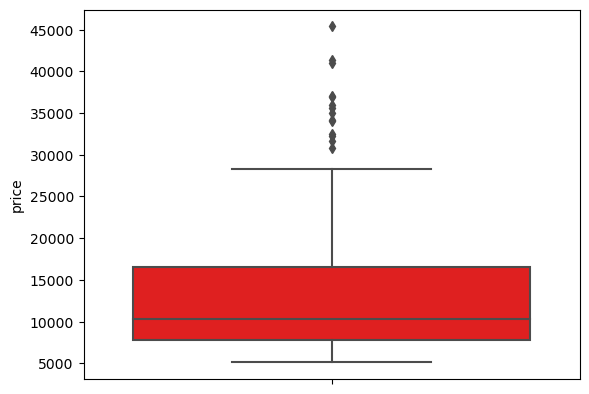

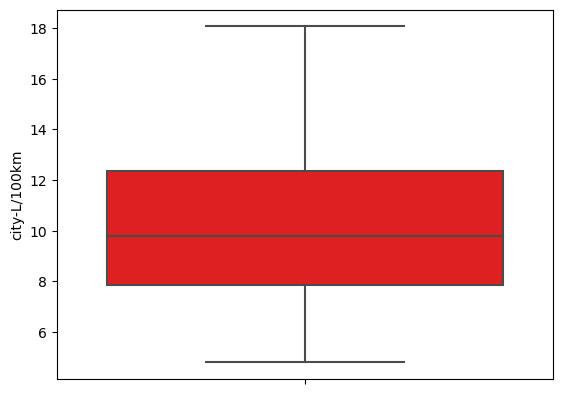

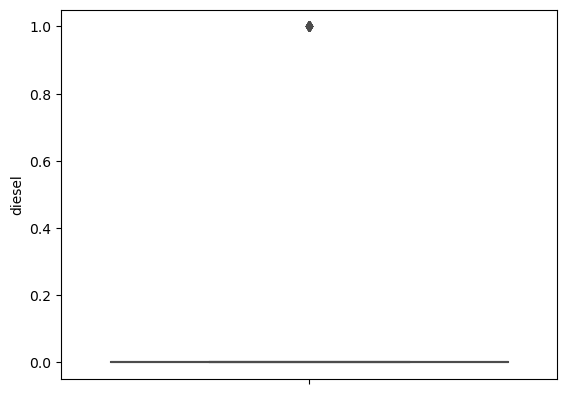

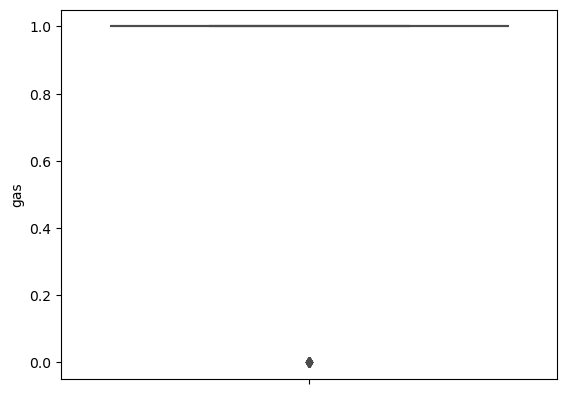

In [67]:
# Checking for outliers using boxplot
for i in data.columns:
    if data[i].dtype!="object":
        sns.boxplot(y=data[i],color="red")
        plt.show()

In [68]:
# Limiting outliers
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL

In [69]:
for column in data.columns:
    if data[column].dtype != "object":
        UL, LL = outlier_limit(data[column])
        data[column] = np.where((data[column]>UL) | (data[column]<LL),np.nan,data[column])

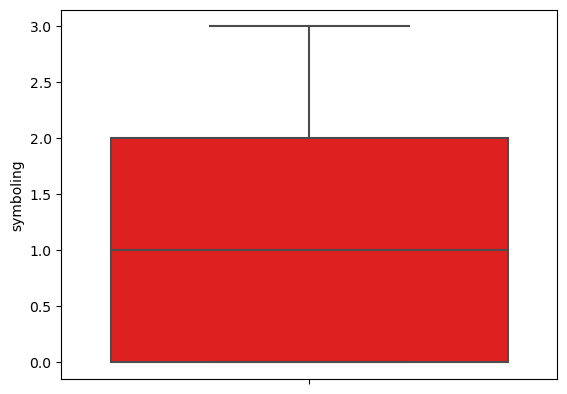

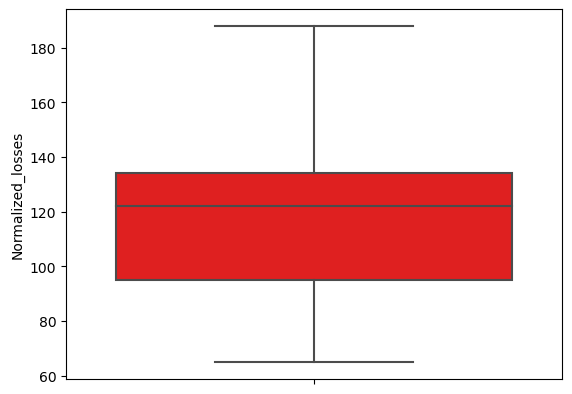

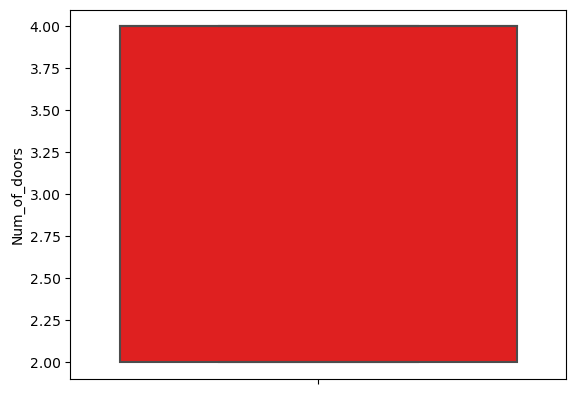

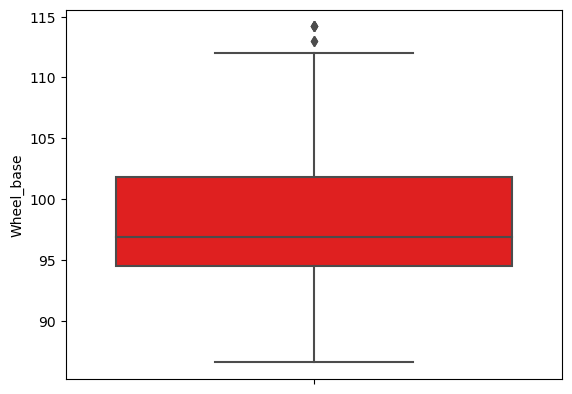

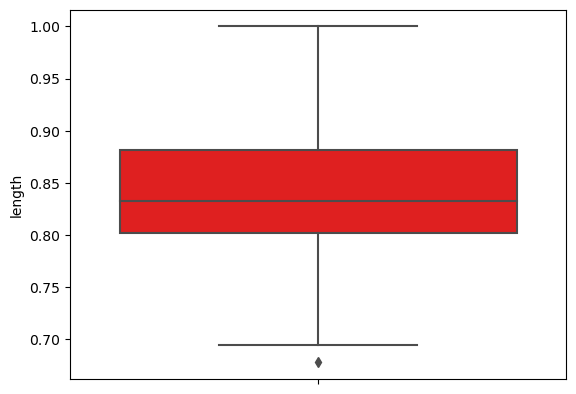

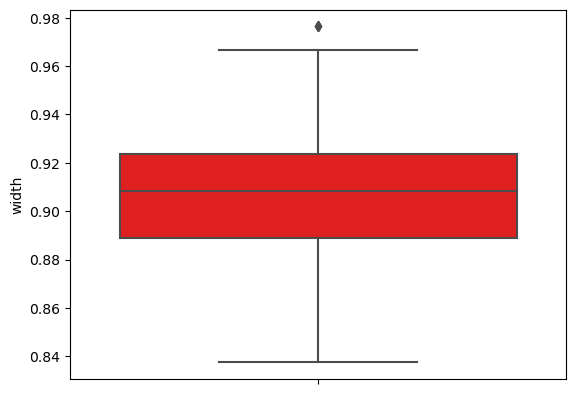

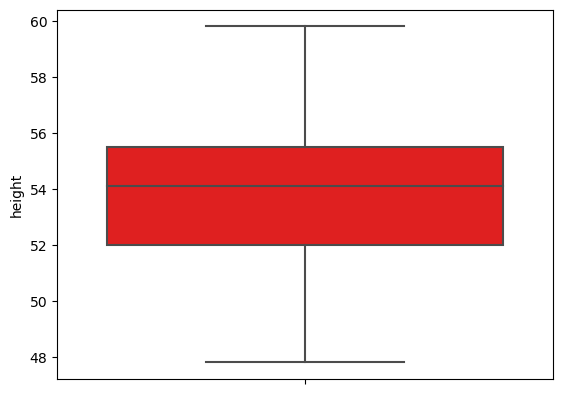

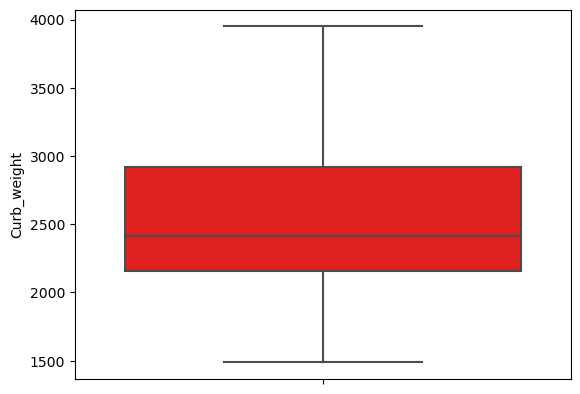

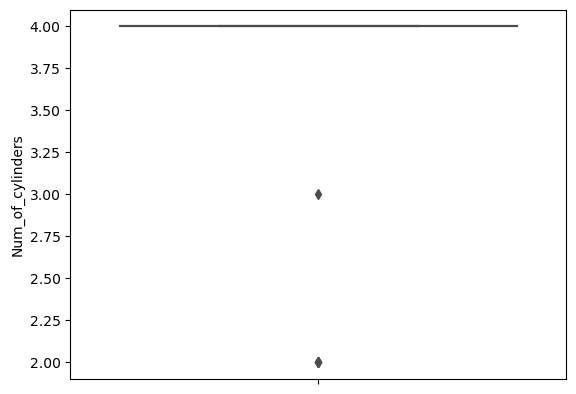

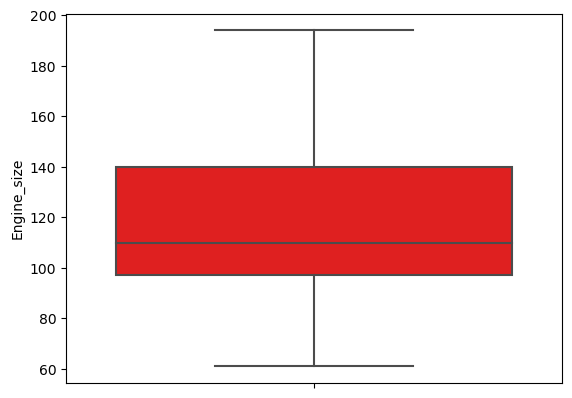

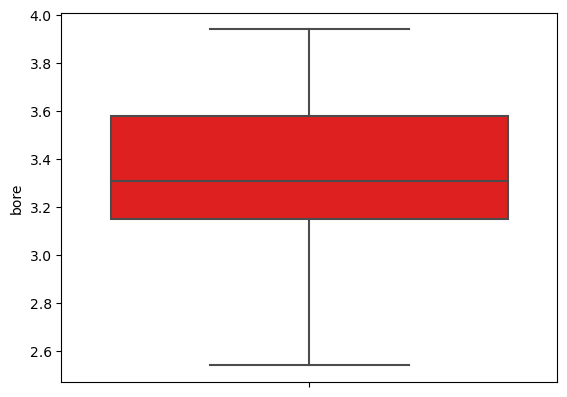

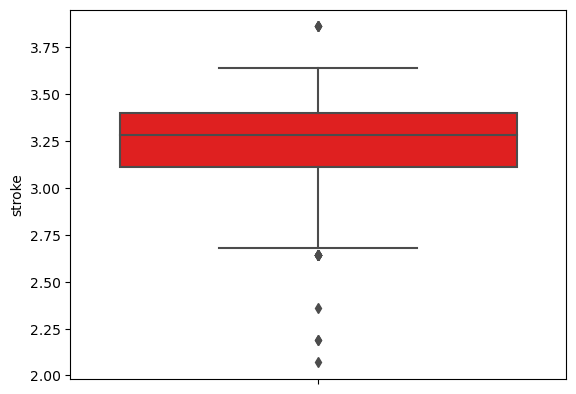

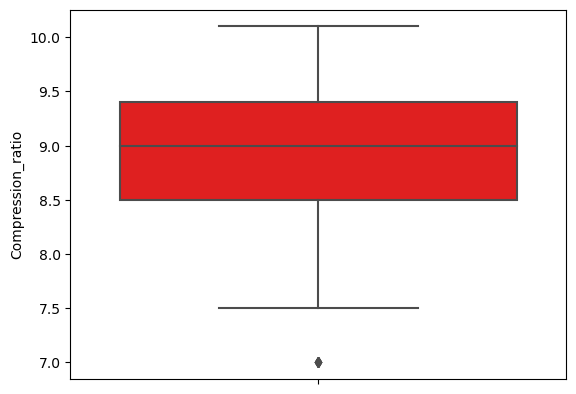

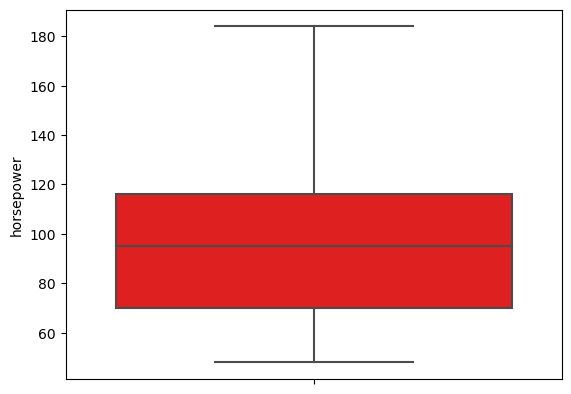

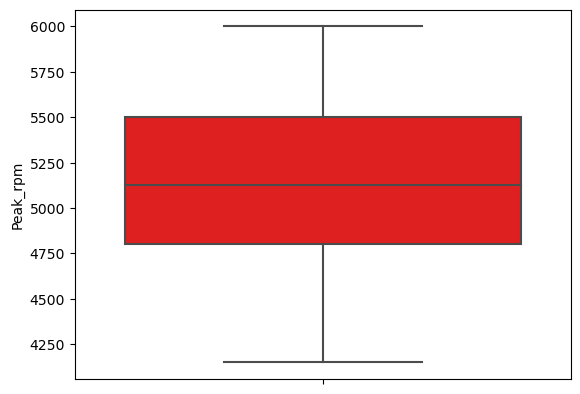

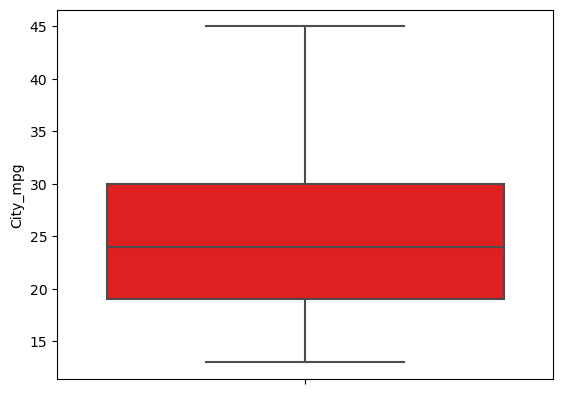

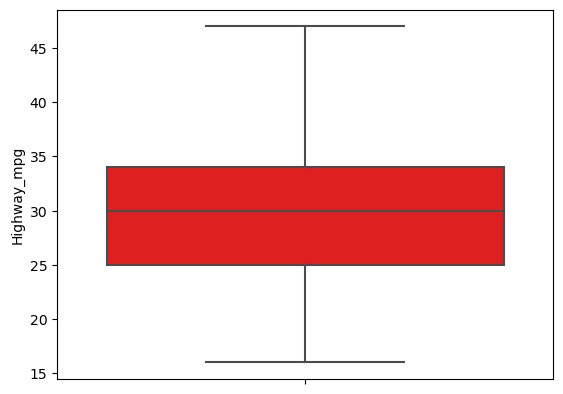

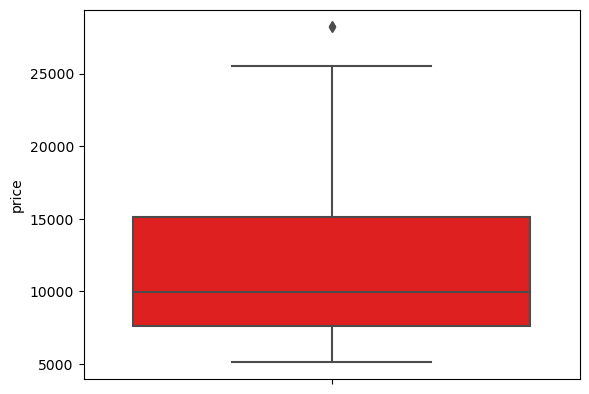

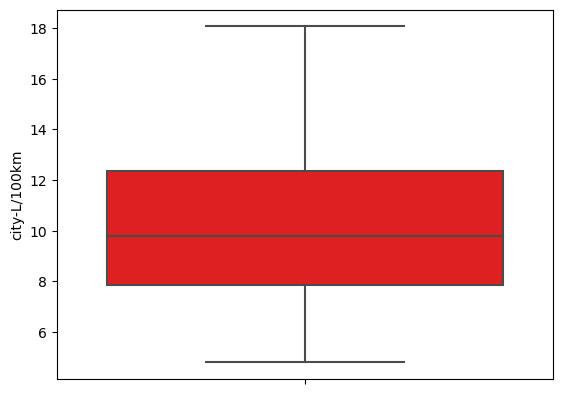

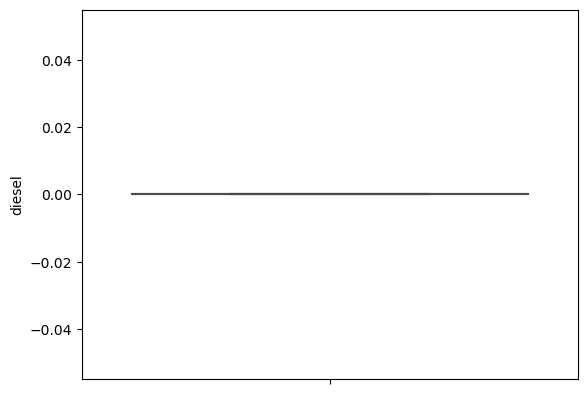

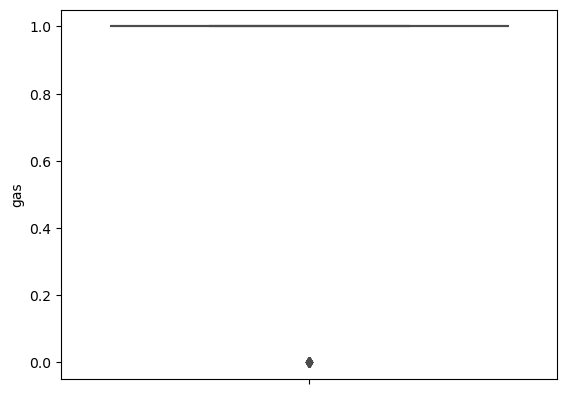

In [70]:
for i in data.columns:
    if data[i].dtype!="object":
        sns.boxplot(y=data[i],color="red")
        plt.show()

In [71]:
data.isnull().mean()*100

symboling            12.437811
Normalized_losses     3.980100
make                  0.000000
aspiration            0.000000
Num_of_doors          0.000000
Body_style            0.000000
Drive_wheels          0.000000
Engine_location       0.000000
Wheel_base            1.492537
length                0.000000
width                 4.975124
height                0.000000
Curb_weight           0.995025
Engine_type           0.000000
Num_of_cylinders     19.402985
Engine_size           4.975124
Fuel_system           0.000000
bore                  0.000000
stroke                2.487562
Compression_ratio    10.447761
horsepower            2.487562
Peak_rpm              0.995025
City_mpg              0.995025
Highway_mpg           1.492537
price                 6.965174
city-L/100km          0.000000
diesel                9.950249
gas                   0.000000
dtype: float64

In [72]:
data.dropna(inplace=True)

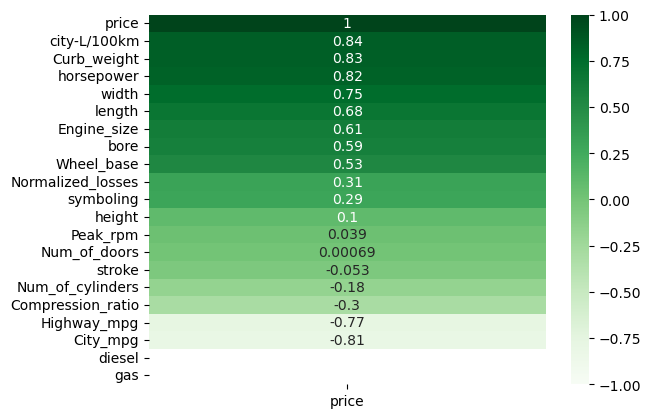

In [74]:
sns.heatmap(data.corr()[["price"]].sort_values(by="price", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Greens");

### LABEL ENCODING THE CATEGORICAL COLUMNS

In [76]:
le = LabelEncoder()

In [75]:
for col in data.columns:
    if data[col].dtypes == 'object':
        print(col)

make
aspiration
Body_style
Drive_wheels
Engine_location
Engine_type
Fuel_system


In [78]:
columns_to_encode = ['make','aspiration','Body_style','Drive_wheels','Engine_location','Engine_type','Fuel_system']
for col in columns_to_encode:
    data[col] = le.fit_transform(data[col])

### CHECKING THE CORRELATION WITH TARGET VALUES

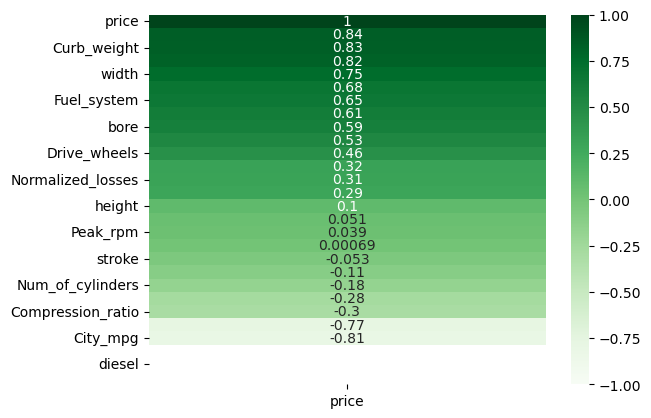

In [79]:
sns.heatmap(data.corr()[["price"]].sort_values(by="price", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Greens");

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 189
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          121 non-null    float64
 1   Normalized_losses  121 non-null    float64
 2   make               121 non-null    int32  
 3   aspiration         121 non-null    int32  
 4   Num_of_doors       121 non-null    float64
 5   Body_style         121 non-null    int32  
 6   Drive_wheels       121 non-null    int32  
 7   Engine_location    121 non-null    int32  
 8   Wheel_base         121 non-null    float64
 9   length             121 non-null    float64
 10  width              121 non-null    float64
 11  height             121 non-null    float64
 12  Curb_weight        121 non-null    float64
 13  Engine_type        121 non-null    int32  
 14  Num_of_cylinders   121 non-null    float64
 15  Engine_size        121 non-null    float64
 16  Fuel_system        121 non

### LETS TAKE ONLY THE COLUMNS THAT IS GOOD CORRELATION WITH TARGET

In [144]:
x=data[["Curb_weight","width","Fuel_system","bore","Drive_wheels","Normalized_losses"]].values
y=data[["price"]].values

### Feature Scaling

In [145]:
sc=StandardScaler()

In [146]:
x=sc.fit_transform(x)

### MODEL SELECTION

In [147]:
models = {
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "KNeighborsRegressor":KNeighborsRegressor()
}

In [148]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=20,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  2328.4850859842873
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  2088.7797005064867
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  1875.0113035816594
****************************************************************************************************
cross validation model : RandomForestRegressor
AVERAGE RMSE:  1910.1916683784063
****************************************************************************************************
cross validation model : KNeighborsRegressor
AVERAGE RMSE:  2100.1860608255392
****************************************************************************************************


In [149]:
ab = AdaBoostRegressor()

### SPLITTING THE DATASET INTO TESTING AND TRAINING DATA

In [159]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

In [160]:
ab.fit(x_train, y_train)

AdaBoostRegressor()

### MODEL ACCURACY

In [161]:
print("model trained with {}".format(ab))
training_score = ab.score(x_train, y_train)*100
testing_score = ab.score(x_test, y_test)*100
score = r2_score(y_test, ab.predict(x_test))*100
mae = mean_absolute_error(y_test, ab.predict(x_test))
mse = mean_squared_error(y_test, ab.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

model trained with AdaBoostRegressor()
r2score:  80.84374129575251
training_score:  91.07999252757773
testing_score:  80.84374129575251
mae:  836.9350687544688
mse:  1483584.6030972362
rmse_test:  1218.0248778646667


In [163]:
y_pred = ab.predict(x)

In [164]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
OUTPUT

,ACTUAL,PREDICTED
0,13495.0,14611.589286
1,16500.0,14611.589286
2,13950.0,11845.000000
3,6295.0,6257.666667
4,6575.0,6285.285714
...,...,...
116,8195.0,9194.758621
117,8495.0,9258.600000
118,9995.0,9678.000000
119,11595.0,9769.148148


#### WE CAN SEE THAT PREDICTION IS CLOSER TO ACTUAL VALUE

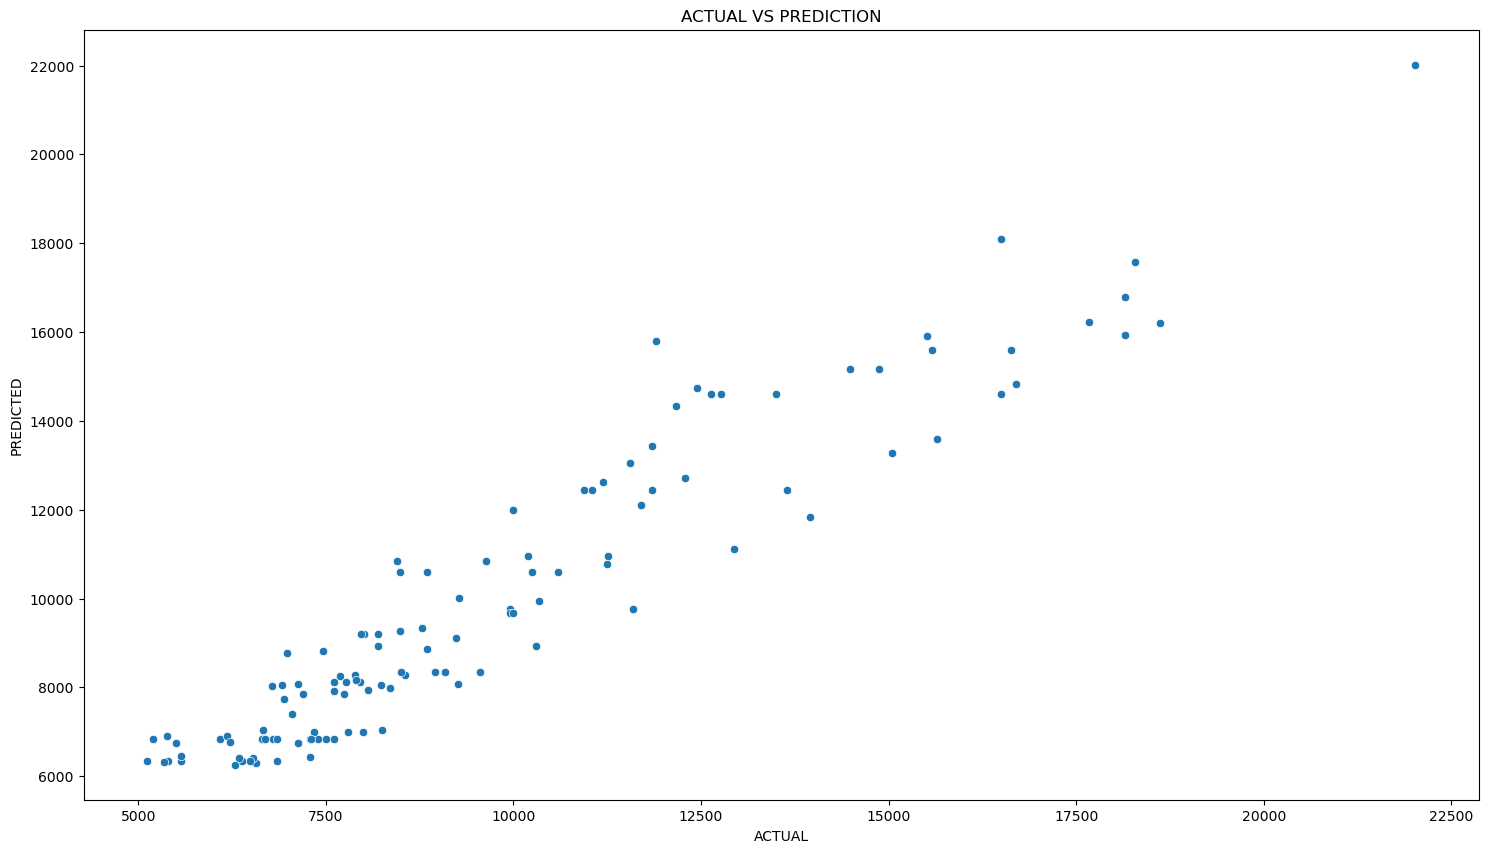

In [165]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='ACTUAL', y='PREDICTED', data=OUTPUT)
plt.title("ACTUAL VS PREDICTION")
plt.show()